In [3]:
import openai
import json
from IPython.display import Image, display, Audio, Markdown
import base64

# Preview image for context

# OpenAI API 키 설정
openai.api_key = ''

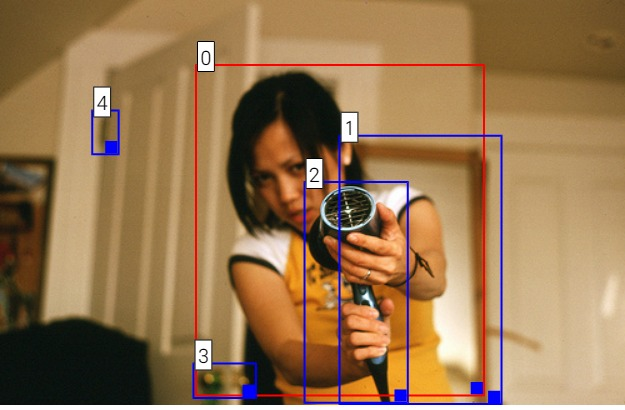

number of box: 5
[['wrist', 'girls', 'shirt', 'girl', 'finger', 'woman', 'black'], ['wall', 'girl', 'door', 'woman'], ['hairdryer', 'woman', 'hair'], ['door'], ['door']]


([['wrist', 'girls', 'shirt', 'girl', 'finger', 'woman', 'black'],
  ['wall', 'girl', 'door', 'woman'],
  ['hairdryer', 'woman', 'hair'],
  ['door'],
  ['door']],
 '/9j/4AAQSkZJRgABAQAAAQABAAD/4gHYSUNDX1BST0ZJTEUAAQEAAAHIAAAAAAQwAABtbnRyUkdCIFhZWiAH4AABAAEAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAACRyWFlaAAABFAAAABRnWFlaAAABKAAAABRiWFlaAAABPAAAABR3dHB0AAABUAAAABRyVFJDAAABZAAAAChnVFJDAAABZAAAAChiVFJDAAABZAAAAChjcHJ0AAABjAAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAAgAAAAcAHMAUgBHAEJYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9YWVogAAAAAAAA9tYAAQAAAADTLXBhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABtbHVjAAAAAAAAAAEAAAAMZW5VUwAAACAAAAAcAEcAbwBvAGcAbABlACAASQBuAGMALgAgADIAMAAxADb/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBA

In [4]:
def load_data(file_num):
    """
    @description
    주어진 경로에서 JSON 파일을 불러와 오브젝트를 추출하는 함수
    """

    try:
        IMAGE_PATH = f"C:\\workplace\\Kilab\\etri\\dataset\\취합\\평가셋\\images for Task-B\\boxedImage{file_num}.jpg"
        display(Image(IMAGE_PATH))
        with open(IMAGE_PATH, "rb") as image_file:
            base64_image = base64.b64encode(image_file.read()).decode("utf-8")
    except :
        base64_image = ""
    
    object_list=[]
    try :
        file_path =f'C:\\workplace\\Kilab\\git\\caption_tool\\typescript\\front\\public\\json\\outputJson\\output_{file_num}.json'
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        
        # 박스를 캡션 수를 기준으로 내림차순
        sorted_boxes = sorted(data['new_bounding_boxes'],key=lambda x: len(x['captions']), reverse=True)
        # 전체 박스 개수
        print("number of box:", len(sorted_boxes))
        # 박스 개수 8개 이하로 줄이기
        if len(sorted_boxes)>8: sorted_boxes = sorted_boxes[:7]
        # print(sorted_boxes)
        
        # 박스 후처리
        # 원래 region 별 캡션 리스트 정보(캡션/region_id)
        # region_descriptions_list = data[list(data.keys())[0]]['region_descriptions_list']
        # # region_id로 매핑할 정보들
        # new_all_regions = data[list(data.keys())[0]]['new_all_regions']
        
        # 캡션 내 키워드 추출
       
        for box in sorted_boxes:
            # object_list에 빈 리스트 추가
            object_list.append([])
            # 캡션 세트 리스트 가져오기
            for captions in box['captions']:
                correct_keywords= [item.lower() for item in captions['caption'].split(' ') if item not in captions['errorCaption'][0].split(' ')]
                [object_list[-1].append(correct_keyword) for correct_keyword in correct_keywords] 
            # break
            # captions = [captions['caption'] for captions in box['captions']]
            # # print("correct captions of box:", captions)
            # for caption in captions:
            #     region_id_list = [region_descriptions['region_id'] for region_descriptions in region_descriptions_list if region_descriptions['phrase'].lower().strip()==caption.lower().strip()]
            #     for region_id in region_id_list:
            #         for region in new_all_regions:
            #             if region['region_id']==region_id:
            #                 # print("3")
            #                 observed_objects = region['synsets']
            #                 if len(observed_objects) > 0 : 
            #                     if isinstance(observed_objects[0], dict):
            #                         observed_objects = [observed_object['synset_name'] for observed_object in observed_objects]
                            
            #                 [object_list[-1].append(observed_object) for observed_object in observed_objects] 
            #                 print
            #                 break

        
    except :
        print("json 데이터 읽는 중 오류 발생")
    finally :
        object_list = [list(set(objects)) for objects in object_list]
        print(object_list)
        return object_list, base64_image
load_data(1160)

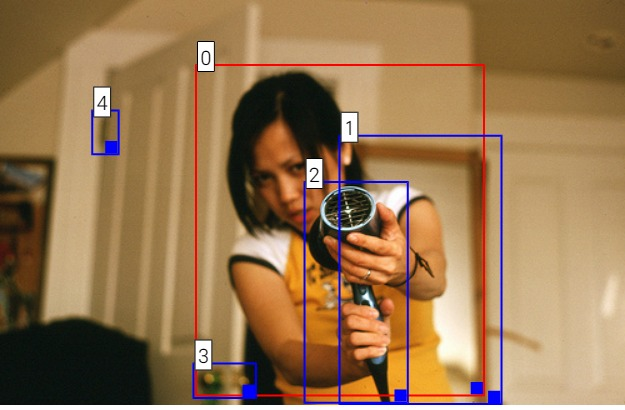

number of box: 5
[['wrist', 'girls', 'shirt', 'girl', 'finger', 'woman', 'black'], ['wall', 'girl', 'door', 'woman'], ['hairdryer', 'woman', 'hair'], ['door'], ['door']]
예제 ID: 1160, GPT 결과: 1. **Wrist and Hairdryer Interaction**: The girl’s wrist and hand are prominently featured as she holds the hairdryer, showcasing a moment of personal grooming. This interaction highlights the importance of self-care and the tools used in daily routines.

2. **Girl in a Domestic Setting**: The girl stands against a backdrop of a door and wall, emphasizing a home environment. This setting reflects a casual, intimate moment, capturing the essence of everyday life and personal space.

3. **Focus on the Hairdryer**: The hairdryer takes center stage, symbolizing beauty and personal care. Its design and the girl’s grip suggest an active engagement in styling, illustrating the connection between tools and self-expression.


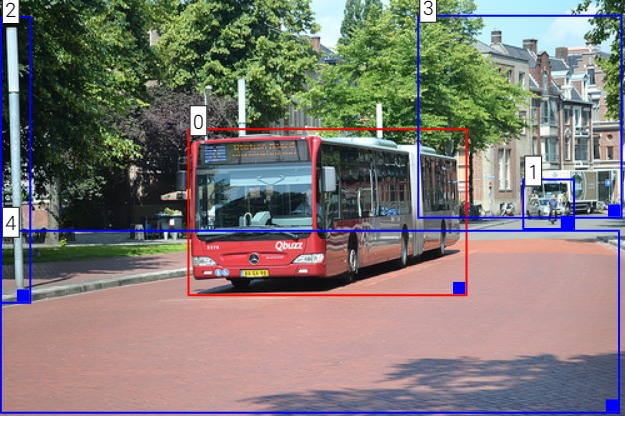

number of box: 5
[['"qbuzz"', 'license', 'bus.', 'plate', 'letters', 'bus', 'sign'], ['man', 'person'], ['pole'], ['building'], ['road']]
예제 ID: 1161, GPT 결과: ### Bounding Box Descriptions

**Box 0: Bus Region**  
The prominent red bus, marked with "Qbuzz," dominates the scene, showcasing public transportation. Its presence signifies urban mobility, connecting people and places within the city landscape.

**Box 1: Man and Surroundings**  
A person stands near the bus stop, highlighting the interaction between commuters and public transport. This area emphasizes the human element in urban transit, reflecting daily routines and social dynamics.

**Box 3: Building and Environment**  
The buildings in the background provide context to the urban setting, framing the bus stop area. Their architectural style contributes to the city's character, blending history with modern transportation needs.


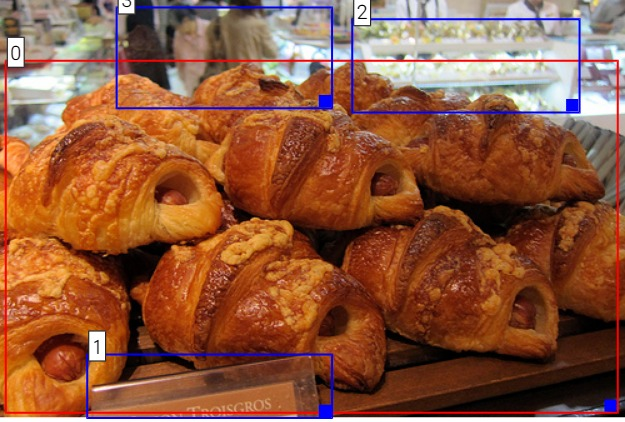

number of box: 4
[['shelf', 'dogs', 'pastry', 'crunchy', 'croissants', 'croissant', 'dog', 'goods', 'dog.', 'troisgros', 'pasteries', 'croissant.', 'pastries', 'pie', 'cheese', 'hot', 'sausage'], ['sign'], ['shelf', 'case', 'display', 'pastries', 'counter'], ['people', 'poeple']]
예제 ID: 1162, GPT 결과: ### Example Paragraphs

1. The display shelf showcases an enticing array of pastries, prominently featuring golden croissants. Their flaky texture and rich aroma attract attention, inviting customers to indulge in these delightful baked goods, enhancing the overall appeal of the bakery.

2. A sign positioned above the pastry display provides essential information, guiding customers through their choices. Its clear visibility ensures that patrons can easily navigate the offerings, contributing to a seamless shopping experience in the bustling bakery environment.

3. The lively atmosphere is enriched by the presence of people interacting with the pastry selection. Their engagement reflects a

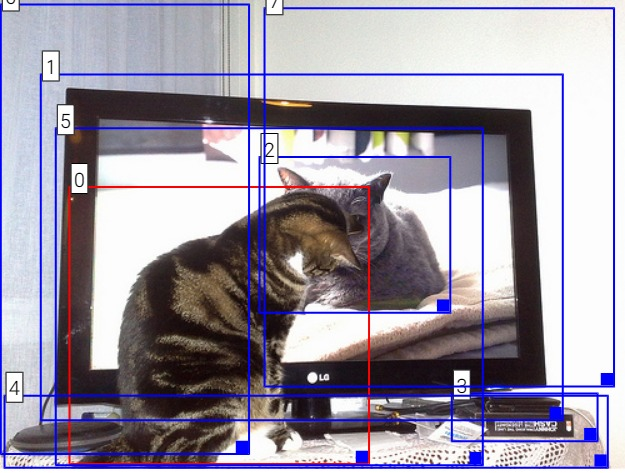

number of box: 8
[['stripes', 'cat'], ['monitor.', 'tv', 'computer', 'wall', 'cat', 'table'], ['cat', 'ear'], ['player', 'lettering', 'table.'], ['cloth', 'fabric'], ['cats'], ['window'], ['wall']]
예제 ID: 1164, GPT 결과: ### Example Paragraphs

1. The scene captures a cozy interaction between two cats, one in the foreground and another on the screen. The monitor displays a serene moment, enhancing the warm atmosphere of the room, where the cats seem to share a connection.

2. A cluttered table supports a monitor, showcasing a playful cat image. The surrounding elements, including fabric and wall, create a homely environment, emphasizing the bond between the real cat and its digital counterpart.

3. The window light softly illuminates the space, highlighting the cats and their playful demeanor. The combination of the monitor and the table adds depth, creating a lively yet tranquil setting that invites viewers into this intimate moment.


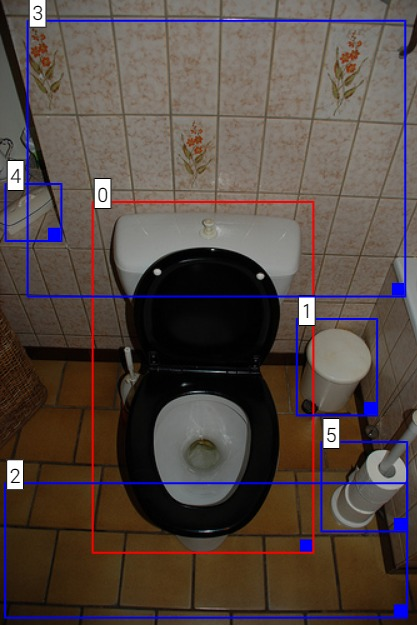

number of box: 6
[['lid', 'flusher', 'seat', 'bowl', 'toilet'], ['bin', 'garbage', 'trash'], ['tile', 'tiles'], ['wall'], ['brush', 'cleaner', 'toilet'], ['toilet', 'rolls']]
예제 ID: 1166, GPT 결과: ### Paragraphs for Large Regions

1. **Toilet Area**: This region encompasses the toilet, including the lid, flusher, seat, and bowl. It serves as the focal point of the bathroom, highlighting essential sanitary features and functionality.

2. **Waste Management**: The area containing the bin and garbage emphasizes cleanliness and waste disposal. This region is crucial for maintaining hygiene, showcasing the importance of proper waste management in a bathroom setting.

3. **Wall and Tiles**: The tiled wall region adds aesthetic appeal and functionality. It provides a clean backdrop, enhancing the overall ambiance while ensuring easy maintenance and durability in a moisture-prone environment.


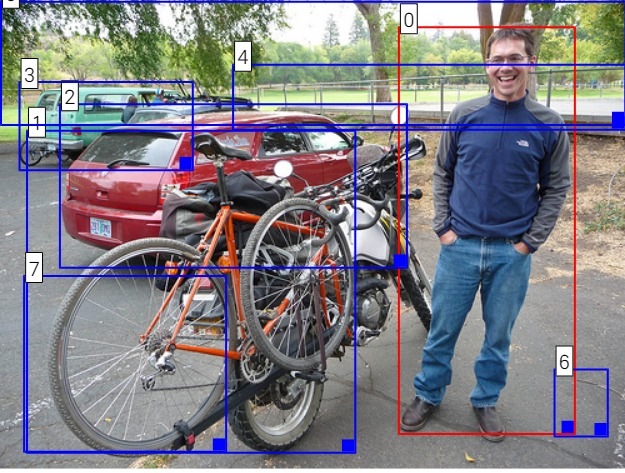

number of box: 9
[['man', "man's", 'motorcycle', 'jacket'], ['bicycle', 'motorcycle', 'orange.', 'motorbike', 'wheel'], ['car', 'motorcycle', 'man'], ['car', 'truck', 'plate'], ['trees', 'fence', 'wood', 'railing'], ['trees', 'park', 'sky'], ['road']]
예제 ID: 1167, GPT 결과: 1. **Active Transportation Scene**: This region captures a vibrant mix of bicycles and motorcycles, highlighting the theme of active transportation. The orange bicycle stands out, emphasizing the diversity of vehicles in the park setting.

2. **Park Environment**: Encompassing trees and a clear sky, this area reflects a serene park atmosphere. The greenery and open space create a refreshing backdrop, enhancing the overall enjoyment of outdoor activities.

3. **Vehicle Interaction**: This section features parked cars and trucks, showcasing urban mobility. The arrangement of vehicles suggests a busy yet organized environment, where different modes of transport coexist harmoniously.


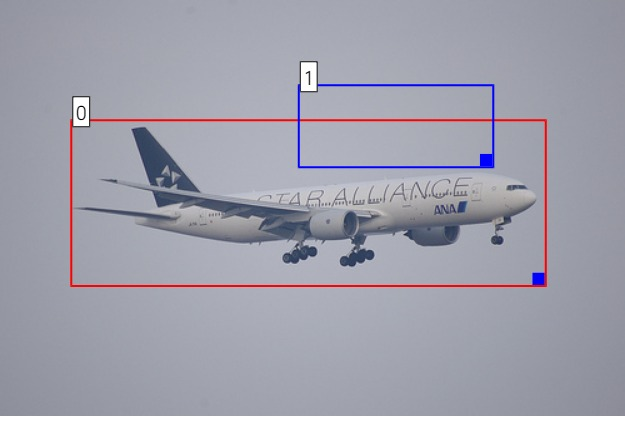

number of box: 2
[['wings', 'plane', 'landing', 'jet', 'sky', 'wing', "plane's", 'letters', 'engine', 'windows', 'fin', 'wheels', 'aircraft', 'on', 'airline', 'airplane'], ['sky']]
예제 ID: 1180, GPT 결과: ### Bounding Box Descriptions

**Box 0: Aircraft in Flight**  
The airplane, adorned with the "STAR ALLIANCE" logo, gracefully descends through the sky. Its wings and engines are prominent, showcasing the engineering marvel of aviation as it approaches landing amidst a serene backdrop.

**Box 1: Expansive Sky**  
The vast sky envelops the scene, providing a tranquil canvas for the aircraft's journey. Its muted tones create a peaceful atmosphere, emphasizing the contrast between the dynamic airplane and the calmness of the open air.


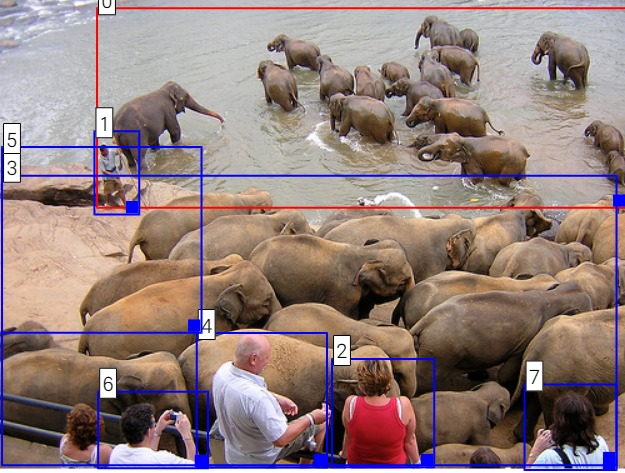

number of box: 11
[['elephants', 'elephant'], ['man', 'elephant'], ['woman'], ['elephants'], ['man'], ['rock'], ['people', 'person', 'man']]
예제 ID: 1168, GPT 결과: 1. The scene captures a lively gathering of elephants in a river, showcasing their natural behavior. The water reflects their movements, creating a dynamic atmosphere as they interact with one another, emphasizing the beauty of wildlife in its habitat.

2. In the foreground, a group of people observes the elephants, capturing the moment with their cameras. Their presence highlights the connection between humans and nature, illustrating the joy of witnessing these majestic creatures up close.

3. The rocky shoreline provides a natural frame for the elephants, enhancing the visual appeal of the scene. The contrast between the earthy tones of the rocks and the vibrant elephants adds depth, drawing attention to the harmony of the environment.


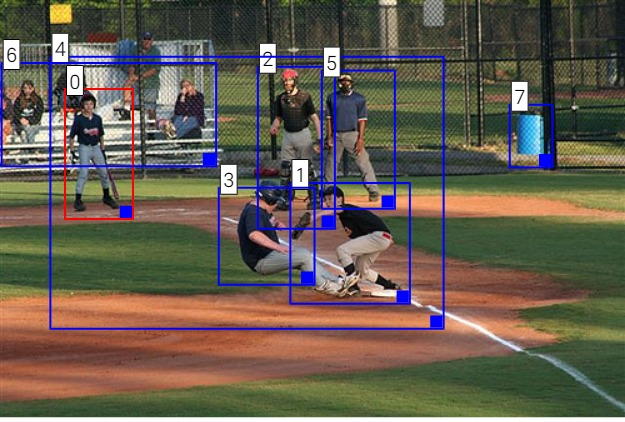

number of box: 14
[['batter', 'person', 'player', 'kid'], ['person', 'baseball', 'player', 'baseman', 'third', 'boy', 'base'], ['person', 'mask', 'catcher'], ['player', 'person', 'kid'], ['baseball'], ['umpire'], ['people', 'spectators']]
예제 ID: 1277, GPT 결과: ### Example Paragraphs

1. **Infield Action**: The scene captures a dynamic moment on the baseball field, highlighting the interaction between players at home plate. The batter and catcher are engaged in a critical play, showcasing the intensity of the game.

2. **Spectator Engagement**: In the background, a group of spectators watches the game unfold. Their presence adds to the atmosphere, emphasizing the community aspect of youth sports and the excitement shared among fans.

3. **Umpire Oversight**: The umpire stands poised to make a call, overseeing the action at home plate. This role is crucial in maintaining the flow of the game, ensuring fair play and adherence to the rules.


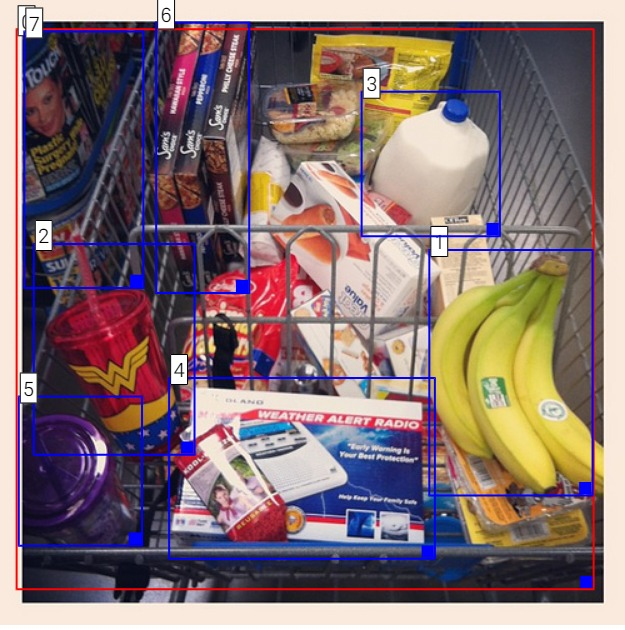

number of box: 15
[['cart', 'items', 'food', 'shopping', 'grocery'], ['banana', 'bananas', 'banannas'], ['cup', 'wonder', 'woman'], ['milk'], ['paper', 'radio'], ['cup'], ['pizzas', 'pizza', "pizza's"]]
예제 ID: 1279, GPT 결과: ### Example Paragraphs

1. The grocery cart is filled with various food items, including fresh produce like bananas and packaged goods. This collection highlights the essentials for a well-rounded shopping experience, showcasing both healthy choices and convenience foods.

2. A vibrant cup featuring a superhero design stands out among the items, symbolizing a playful touch in the shopping haul. Nearby, a weather alert radio emphasizes preparedness, blending everyday needs with safety considerations in one cart.

3. The presence of milk and pizza indicates a mix of staple and indulgent items, appealing to diverse meal preferences. This combination reflects a balance between nutritious options and comfort food, catering to different tastes within a single shopping tri

[None, None, None, None, None, None, None, None, None, None]

In [6]:
def generate_paragraph(file_num, model="gpt-4o-mini", temperature=0):
    """
    @description
    주어진 입력 데이터에 기반하여 GPT 모델을 통해 추론을 생성하는 함수
    """
    # 오브젝트 리스트 + 이미지 뽑아내기
    object_list, base64_image = load_data(file_num)
    
    # 프롬프트 생성
    # 이미지의 오브젝트간 연관성을 기준으로 큰 범위의 바운딩박스를 생성 
    objects = [ f"box{index}: {objects}" for index, objects in enumerate(object_list)]
    prompt = (
        f"""
        Based on the given image, Create a large range of bounding boxes based on the correlation between original regions in the image.
        the large range of bounding boxes according to the following rules and create a paragraph for each large region. 
        Each paragraph should be within 40 words. Provide 2-3 examples as shown below.
        ***Be careful not to describe each original region individually.***
        
        
        [Region selection rules]

        Perspective
        Object-oriented
        Prioritize highly related objects
        Distinguish unique points of the image
        Adjust prompt complexity based on difficulty
        
        [Objects observed in the image]
        {objects}
            
        """
    )
    
    # GPT 모델에 요청
    response = openai.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": "You are a intelligent AI assistant."},
            {"role": "user", "content": [
                {"type":"text","text":prompt},
                {"type": "image_url", "image_url": {
                    "url": f"data:image/png;base64,{base64_image}"
                    }
                }
                ]
             }
        ],
        max_tokens=200,
        n=1,
        # stop=None,
        temperature=temperature
    )
    
    return response.choices[0].message.content.strip()


# 평가 데이터 파일 경로
# 결과 저장을 위한 리스트 초기화

    
def save_json(file_num):
    """
    @description
    generate_paragraph를 호출해 받아온 데이터를 JSON 파일로 저장하는 함수
    """
    
    # generate_paragraph 호출
    # 이미지에 대한 답 생성
    result = ""
    result = generate_paragraph(file_num)
    print(f"예제 ID: {file_num}, GPT 결과: {result}")
    
    # 데이터 생성
    # 기존 output 데이터 + paragraph 키 붙임
    data={}
    try :
        file_path =f'C:\\workplace\\Kilab\\git\\caption_tool\\typescript\\front\\public\\json\\outputJson\\output_{file_num}.json'
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
    except :
        print("json 데이터 읽는 중 오류 발생")
    finally :
        data['paragraph']={'gpt_version':result,
                           'annotator_version':result}
        
        
    with open(f'paragraph{file_num}.json', 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)

file_list = [1160, 1161, 1162,1164,1166,1167,1180,1168,1277,1279]
file_num = 2100
[save_json(file_num) for file_num in file_list]